# [AI 이노베이션 스퀘어] 12기 고급 시각반
- github: https://github.com/hysKim1/AI_Vision
    - [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
    - [DL]https://www.tensorflow.org/?hl=ko
    
    
---
* [영상처리를 위한 딥러닝4](#영상처리를-위한-딥러닝4)
  * [Convolutional Neural Network](#Convolutional-Neural-Network)
      * [FCNN](#FCNN)
      * [CNN](#CNN)
          * [CNN Architecture](#CNN-Architecture)
          * [CNN 특징](#CNN-특징)
          * [CNN 가정](#CNN-가정)
          * [CNN 문제점](#CNN-문제점)
          
  * [CNN구현](#CNN구현)
      * [흑백 이미지: mnist](#흑백-이미지)
      * [색상 이미지: cifar10](#색상-이미지)

---
## 영상처리를 위한 딥러닝4

CNN.pdf 참고

## CNN의 가정


- [Alexnet](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)
    > “They also make strong and mostly correct assumptions about the nature of images (namely, stationarity of statistics and locality of pixel dependencies).”.

1. stationarity of statistics 위치에 관련 없는 불변적 특징
    - 이미지의 특정 위치에서 학습한 파라미터를 이용해서 **다른 위치에 있는 동일한 특징을 추출**\
        - weight sharing과 찰떡
        - 특징을 학습한 필터 하나가 이미지 전체 영역을 이동하면서(parameter sharing) Convolution 연산을 수행하면 stationarity 특성을 가진 이미지에서 한장의 입 모양 필터로 여러개의 입 특징을 모두 추출
    - 산량은 더 적고, 메모리 사용량도 적고, 통계적 효율성(statistical efficienty : 적은데이터로 좋은 성능 나오는 경우 의미)도 더 높기
2. locality of pixel dependencies  주변의 weight만 계산
    - 이미지를 구성하는 특징들은 이미지 전체가 아닌 일부 지역에 근접한 픽셀들로만 구성되고 근접한 픽셀들끼리만 종속성을 가진다
        - Sparse interactions과 찰떡 
        - 하나의 출력 유닛이 입력의 전체 유닛과 연결되어 있지않고 입력의 일부 유닛들과만 연결되어 있다는 의미로 주변 픽셀들과만 연관이 있다는 가정인 locality와 딱 들어 맞는다.
            
> 이미지의 특성인 stationarity of statistics와 locality of pixel dependencies를 가정하여 만들어진 CNN 모델이 이미지를 잘 다루는 건 당연한 일이다.
동일한 특징이 이미지내 여러 지역에 있을 수 있고, 작은 지역안에 픽셀 종속성이 있다는 가정 때문에 파라미터를 공유하고 sparse interaction을 가지는 필터와 Convolution연산을 하는것은 완벽하게 잘 들어맞는다.
그리고 Convolution 연산의 translation equivariance 특성에 파라미터 공유를 더해서 CNN 이 translation invariance를 가지게 된다는 것도 이해했다.


## Translational Invariance Vs Translational Equivariance
- data augmentaion 에서 사용되는 테크닉

### Translational Equivariance
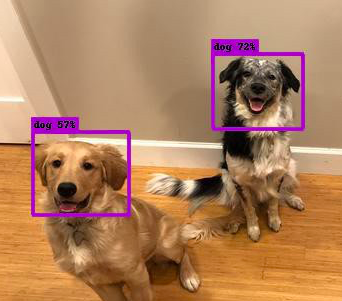
- weight sharing의 결과물 
- 입력의 위치가 변하면 출력도 동일하게 위치가 변한채로 나온다
- 필터 하나로 다양한 위치에서 특징 추출
- 동일한 가중치가 영상에 걸쳐 공유되기 때문에 어떤 영상에서 물체가 발생하면 영상에서 물체의 위치와 관계없이 검출


### Translational Invariance
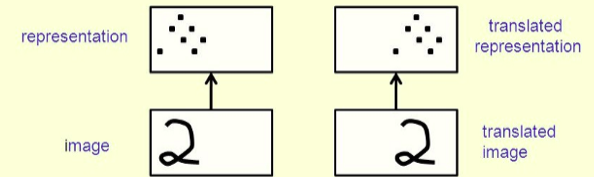
- pooling의 결과물 
- 입력의 위치가 변해도 출력은 변하지 않는다
- pooling으로 대표값으로 압축되면서 입력값이 약간 변해도 출력에 영향을 주지 않음
예. 얼굴에서 눈,코,입의 정확한 위치는 몰라도 있는지 여부 확인 하는것
- input의 **위치에 상관없이** output이 동일한 값 동일하므로 특성이 변하지 않음

CNN: convolution + weight sharing
  - **CNN은 Translational invariance한 NN**(shift )
    - locally connected weight 공유 - 연산량 줄임
    - local 한정된 범위에서만 움직임
    - 마지막의 FCNN 레이어가 **위치에 상관없이** 무엇인지 매핑 
      - **Convolution은 Equivariance to shift, CNN Transitional Invariance**
         - 특징이 어디에 있는지 masking으로 예측
참고: https://medium.com/@seoilgun/cnn의-stationarity와-locality-610166700979
참고: https://towardsdatascience.com/translational-invariance-vs-translational-equivariance-f9fbc8fca63a

### CNN 문제점
- 위치에만 invariance 하며 **rotation, vewpoint, scale , illumination** 데이터에서는 성능이 안 좋음
    1. data augmentation 
    2. **아주 적은 정도**는 pooling으로 유사한 값들을 하나의 대표값으로 여기기 때문(전체를 down-sampling역할을 함)
    - 참고:     - 참고: https://arxiv.org/pdf/1411.6369v1.pdf


        -  stride (pooling 처럼 사용 가능하여 성능 차이 없음)
          > - Yann LeCun : Max-pooling invariance를 보존한다는 장점
          > - Hinton :  Max-pooling 연산량 줄이는데에 효과적이나 **invariance 가 아닌 equivariance**가 필요 


#### 해결책 data augmentation
- transitional invariance 해결책
- 크기, 위치가 다른 데이터를 학습
- rotating, mirroring, scaling up으로 다양한 경우 학습해서 성능 약간 올라가지만 과적합 방지
  - 비율 중요
  - 데이터가 많으면 구조를 복잡하게 해야함
  - 새로운 데이터가 많은게 더 좋음 
  

    > Capsule Network : 위치에 상관있게 만듦 (locally connected with not sharing weights)
      - 특징이 있는지 여부만 보는게 아니라 특징 위치까지 고려
      - EDA가 중요하게 됨


> cherry picking
     - Yann LeCun cake analogy : ML의 분류 강화학습은 체리로 비유하고 비지도학습 빵(핵심)
     - NFL 임에 불구하고 모델 돌리고 나서 좋은 결과만 보여주는 것
        - GAN 극찬했으나 이것도 cherry picking하였고 가능성을 보여주기 위함이였다함
        

최적의 모델 
- 하이퍼파라미터 튜징 GridSearchCV, keras-tuner로 자동으로 찾음
- 기준 모델만들고 Learning curve 보고 결정
 > 오캄의 면도날
     동일한 성능이면 간단한 모델이 더좋음

성능 향상

1. 레이어 
    - 레이어 깊으면 성능은 좋아지나 데이터가 적으면 과적합 가능성 NFL
2. epochs 
    - 학습 량

>  과적합 방지 방법
    - cross validaiotn 
    - feature selection
    - dimensionality reduction
    - bagging
    - early stopping
    - regulizer(L1,L2)
    - dropout
    - noise (image)
    
    
    cs231 https://cs231n.github.io

---
- numpy programming 문제점 
    - GPU 불가
    - mutable
- tensor
    - GPU 지원
    - immutable 
    - functional api
    - 자동미분 Autograd 제공
        - back propagatoin 구현

참고 :https://www.tensorflow.org/tutorials/images/cnn


## CNN구현
- convolution layer :conv2d + Relu Activation + Maxpooling2D
- Flatten + Dense +  Softmax Activation

In [1]:
import tensorflow as tf

### 데이터셋 준비
1. holdout
2. 데이터 모양 변경
    - 알고리즘에 따라서 데이터 받는게 다름(NFL)
    - CNN 3차원 
    - NN에만 효율적
3. 정규화

## 흑백 이미지

In [30]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data() #holdout

X_train = X_train.reshape((-1, 28, 28, 1))  # 6만개의 28x28 흑백 이미지
X_test = X_test.reshape((-1, 28, 28, 1))    # 1만개의 28x28 흑백 이미지

X_train, X_test = X_train / 255.0, X_test/ 255.0  #  0~1 사이로 정규화

#### 1차원 convolution
- Conv1D
- Convolution1D
    - 자연어처리에서 특징 추출, 신호처리

In [31]:
tf.keras.layers.Conv1D is tf.keras.layers.Convolution1D #동일 

True

In [32]:
tf.keras.layers.Conv2D is tf.keras.layers.Convolution2D #동일 

True

### Pipeline
- feature extraction
    - Conv2D, MaxPool2D ,relu
- 예측: classification
    - Flatten,Dense, softmax

### 2차원 convolution
- 입력 (세로,가로,채널) 의 tensor
    - 방법론에 따라서 데이터 바꿈 
- `Conv2D`
- `Convolution2D`
    - args : **filter , kernel_size** , strides, padding data_format: 'valid', 'same', activation,use_bias, kernel_initializer 초기값, regularizer 과적합 방지, constraint 값 범위 정함 


### MaxPool2D
- 피라미드 형태로 node 를 늘리면 특징을 더 잘 추출 

##### Functional API

In [24]:
input_ = tf.keras.Input(shape=(28,28,1))   
conv1=tf.keras.layers.Conv2D(32, 3 ,activation='relu')(input_)
mpool1=tf.keras.layers.MaxPool2D(2)(conv1)
conv2=tf.keras.layers.Conv2D(64, 3, activation='relu')(mpool1)
mpool1=tf.keras.layers.MaxPool2D(2)(conv2)


flatten =tf.keras.layers.Flatten()(mpool1)
dense1 =tf.keras.layers.Dense(64, activation ='relu')(flatten)
dense2 =tf.keras.layers.Dense(10, activation ='softmax')(dense1)

model= tf.keras.Model(inputs=input_, outputs=dense2)

In [25]:
model.summary()

Model: "functional_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

##### Sequential API

In [26]:
#Sequential API 이해용도로 사용
model=tf.keras.models.Sequential([
    tf.keras.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation ='relu'),
    tf.keras.layers.Dense(10, activation ='softmax')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [20]:
#  상동
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

- 연산량이 많아서 FCNN에 비해서 느림 
- 데이터 자체가 전처리 잘 되어 있어서 정확도가 99%로 높음

In [36]:
#fit: gradient tape이용 low-level로 커스터마이징
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1392 - accuracy: 0.9586
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0463 - accuracy: 0.9857
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0327 - accuracy: 0.9900
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0233 - accuracy: 0.9927
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0180 - accuracy: 0.9943


In [37]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                102464    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

## 색상 이미지
- 3 ~ 4 channels
### cifar10
- 60,000개의 10개의 클래스를 갖는 컬러 이미지(3 channels)
- train:test = 6:1

참고 : https://www.tensorflow.org/tutorials/images/cnn

In [38]:
(X_train, y_train), (X_tests, y_test) = tf.keras.datasets.cifar10.load_data() #holdout

#  0~1 사이로 정규화
X_train, X_tests = X_train / 255.0, X_tests/ 255.0

In [39]:
X_train.shape #작

(50000, 32, 32, 3)

In [40]:
import matplotlib.pyplot as plt

- 배경도 있음
- 다양한 이미지(돔물, automobile)
- 다양한 각도

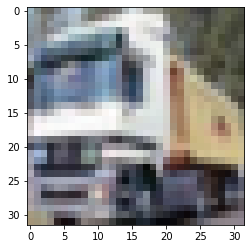

In [41]:
plt.imshow(X_train[1]) 

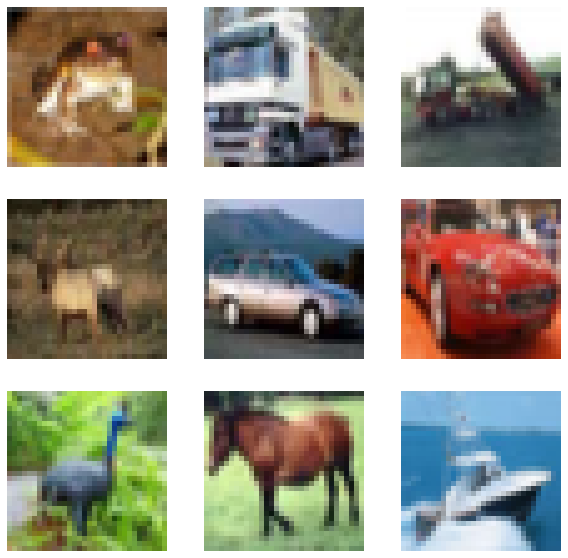

In [42]:
#여러 동물, 자동차,배 사진 섞여 있음
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(X_train[i])
  plt.axis("off")

In [43]:
model=tf.keras.models.Sequential([
    tf.keras.Input(shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),     
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation ='relu'),
    tf.keras.layers.Dense(10, activation ='softmax')
])

In [44]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                147520    
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

In [45]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4829 - accuracy: 0.4660
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1224 - accuracy: 0.6074
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9886 - accuracy: 0.6573
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8991 - accuracy: 0.6879
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8357 - accuracy: 0.7103


### 성능 향상
1. 합성곱 레이어 늘리기

In [46]:
model=tf.keras.models.Sequential([
    tf.keras.Input(shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),    
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation ='relu'),
    tf.keras.layers.Dense(10, activation ='softmax')
])

In [47]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5443 - accuracy: 0.4385
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1843 - accuracy: 0.5815
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0327 - accuracy: 0.6358
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9335 - accuracy: 0.6709
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8598 - accuracy: 0.6983


In [48]:
model=tf.keras.models.Sequential([
    tf.keras.Input(shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),    
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation ='relu'),
    tf.keras.layers.Dense(10, activation ='softmax')
])

In [49]:
#동일함
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

2. epochs를 늘림

In [50]:
 history=model.fit(X_train, y_train, epochs=15, validation_split=0.2)  #성능 체

Epoch 1/15
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6093 - accuracy: 0.4092 - val_loss: 1.3769 - val_accuracy: 0.4976
Epoch 2/15
1250/1250 [==============================] - 4s 3ms/step - loss: 1.2578 - accuracy: 0.5505 - val_loss: 1.1974 - val_accuracy: 0.5849
Epoch 3/15
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0966 - accuracy: 0.6152 - val_loss: 1.0756 - val_accuracy: 0.6258
Epoch 4/15
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0047 - accuracy: 0.6453 - val_loss: 1.0159 - val_accuracy: 0.6462
Epoch 5/15
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9362 - accuracy: 0.6735 - val_loss: 1.0046 - val_accuracy: 0.6489
Epoch 6/15
1250/1250 [==============================] - 4s 3ms/step - loss: 0.8806 - accuracy: 0.6924 - val_loss: 0.9893 - val_accuracy: 0.6571
Epoch 7/15
1250/1250 [==============================] - 4s 3ms/step - loss: 0.8289 - accuracy: 0.7094 - val_loss: 0.9342 - val_accuracy:

In [51]:
history.model.evaluate(X_tests,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0022 - accuracy: 0.6896


[1.0021979808807373, 0.6895999908447266]

In [52]:
history.history

{'accuracy': [0.40917500853538513,
  0.5504500269889832,
  0.6152499914169312,
  0.6452500224113464,
  0.6734750270843506,
  0.6923750042915344,
  0.7093999981880188,
  0.7233499884605408,
  0.7385749816894531,
  0.7494249939918518,
  0.7578750252723694,
  0.7700250148773193,
  0.7800750136375427,
  0.7903249859809875,
  0.7970749735832214],
 'loss': [1.6093446016311646,
  1.2577680349349976,
  1.096623182296753,
  1.004742980003357,
  0.9362399578094482,
  0.8806028366088867,
  0.8288653492927551,
  0.7870686650276184,
  0.7452731132507324,
  0.7136197090148926,
  0.685204029083252,
  0.6494736671447754,
  0.6206862926483154,
  0.592941403388977,
  0.5655162334442139],
 'val_accuracy': [0.4975999891757965,
  0.5849000215530396,
  0.6258000135421753,
  0.6462000012397766,
  0.6488999724388123,
  0.6571000218391418,
  0.678600013256073,
  0.6863999962806702,
  0.6782000064849854,
  0.6851000189781189,
  0.6809999942779541,
  0.6940000057220459,
  0.6984000205993652,
  0.694100022315979,

- loss 내려감 학습 잘됨  accuray증가
- val loss는 과적합
    - epochs 8에서 자르고 다른 방법으로 성능을 높임

교육장 2070있음 서버에서 이요중
tornado서버를 외부에서 접속 할 수있도록 함 ->domain,인증서
서버처럼 사용 

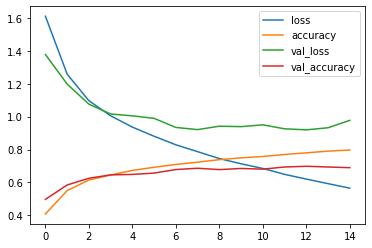

In [53]:
import pandas as pd
pd.DataFrame(history.history).plot.line()

한번에 epochs를 하지않으면 전체 결과값을 한번에 볼수 없음

In [57]:
model=tf.keras.models.Sequential([
    tf.keras.Input(shape=(32,32,3)),
    tf.keras.layers.Conv2D(32,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),    
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation ='relu'),
    tf.keras.layers.Dense(10, activation ='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
hist=model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5573 - accuracy: 0.4317
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1970 - accuracy: 0.5751
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0597 - accuracy: 0.6281
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9745 - accuracy: 0.6591
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9109 - accuracy: 0.6807
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8657 - accuracy: 0.6958
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8161 - accuracy: 0.7138
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7817 - accuracy: 0.7262
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7509 - accuracy: 0.7366
Epoch 10/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.722

In [59]:
 hist=model.fit(X_train, y_train, epochs=5) #hist로부터 누적

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6899 - accuracy: 0.7573
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6679 - accuracy: 0.7655
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6438 - accuracy: 0.7730
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6190 - accuracy: 0.7822
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5967 - accuracy: 0.7897


In [60]:
hist.history #가장 최근의 5 history 만 부분적으로 나옴

{'accuracy': [0.757319986820221,
  0.7654600143432617,
  0.7729600071907043,
  0.7821999788284302,
  0.7897199988365173],
 'loss': [0.6898909211158752,
  0.6679338216781616,
  0.6438254714012146,
  0.6190052628517151,
  0.5966503024101257]}